### Cell 1: Import Libraries
This cell imports the necessary libraries for data analysis, visualization, and audio processing, such as pandas, matplotlib, seaborn, and librosa.

In [12]:
from IPython.display import Audio, display
import os
import pandas as pd
import glob
import librosa
import librosa.displayle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
import sys
from pathlib import Path
import importlib

# Function to automatically find the project root directory
def find_project_root():
    current_path = Path(os.getcwd()).resolve()
    while current_path != current_path.parent:  # Ensures we don't go beyond the system root
        if (current_path / "config.py").exists():
            return current_path
        current_path = current_path.parent
    raise FileNotFoundError("⚠️ config.py not found! Make sure it is in the project root directory.")

# Determine the project root directory
project_root = find_project_root()

# Add the project root to Python's search path (if it's not already there)
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Reload config.py to ensure that any changes are updated
import config
importlib.reload(config)


<module 'config' from 'C:\\Users\\יהונתן רבוח\\OneDrive - Holon Institute of Technology\\Deep Learning Project\\config.py'>

### Cell 2: Define Paths
This cell sets up the necessary directory paths for data and audio file management.

In [10]:
from config import CSV_FILE_PATH, PROCESSED_DATA_DIR, AUDIO_FILES_PATH

PROCESSED_DATA_PATH = os.path.join(PROCESSED_DATA_DIR, 'processed_data')
PROCESSED_FILE = os.path.join(PROCESSED_DATA_PATH, 'processed_data.pkl')

### Cell 3: Load Dataset
This cell loads the dataset from a CSV file into a pandas DataFrame and provides a quick preview.

In [11]:
df = pd.read_csv(CSV_FILE_PATH)
print("Some examples", len(df))
print("Available columns:", df.columns.tolist())
df.head()

Some examples 2000
Available columns: ['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take']


,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


### Cell 4: Unique Categories
This cell calculates and displays the number of unique categories and their distribution in the dataset.

In [8]:
#Unique categories
print("Number of unique categories:", df['category'].nunique())
#print("Unique categories:", df['category'].unique())

#Category distribution
category_counts = df['category'].value_counts()
print("Category distribution:")
print(category_counts)

Number of unique categories: 50
Category distribution:
category
dog                 40
chirping_birds      40
vacuum_cleaner      40
thunderstorm        40
door_wood_knock     40
can_opening         40
crow                40
clapping            40
fireworks           40
chainsaw            40
airplane            40
mouse_click         40
pouring_water       40
train               40
sheep               40
water_drops         40
church_bells        40
clock_alarm         40
keyboard_typing     40
wind                40
footsteps           40
frog                40
cow                 40
brushing_teeth      40
car_horn            40
crackling_fire      40
helicopter          40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
glass_breaking      40
snoring             40
toilet_flush        40
pig             

### Cell 5: Audio File Verification
This cell verifies the availability of audio files and checks for any missing files.

In [9]:
#Path to the audio files
audio_files = glob.glob(os.path.join(AUDIO_FILES_PATH, '*.wav'))

#Verify audio files
print(f"Number of audio files detected: {len(audio_files)} out of {len(df)} in the dataset")
missing_files = set(df['filename']) - set(os.path.basename(file) for file in audio_files)
print(f"Number of missing files: {len(missing_files)}")

Number of audio files detected: 2000 out of 2000 in the dataset
Number of missing files: 0


### Cell 6: Load and Analyze Example Audio
This cell loads an example audio file, displays its details, and plots its waveform.

In [1]:
#Example audio file
example_file = os.path.join(AUDIO_FILES_PATH, df.loc[0, 'filename'])

#Load the audio file
signal, sr = librosa.load(example_file, sr=None)  # Keep the original sample rate

#Display audio details
print(f"Category: {df.loc[0, 'category']}")
print(f"Filename: {df.loc[0, 'filename']}")
print(f"Sample rate: {sr}, Duration: {len(signal) / sr:.2f} seconds")

#Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title(f"Waveform - {df.loc[0, 'category']}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

NameError: name 'os' is not defined

### Cell 7: Visualize Multiple Examples
This cell generates spectrograms for multiple audio examples and plays their audio.

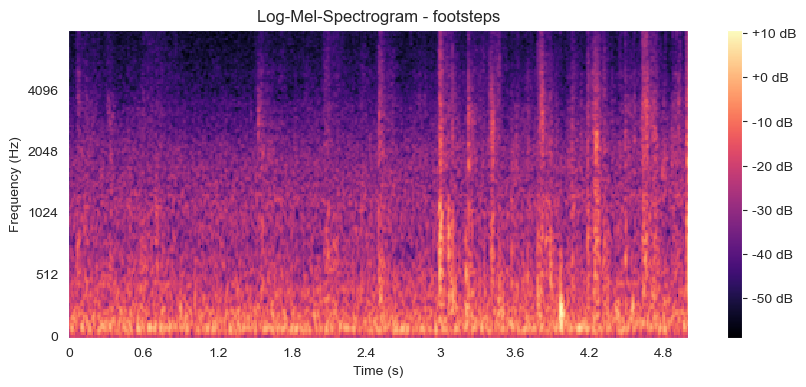

Playing audio: 5-263490-A-25.wav (Category: footsteps)


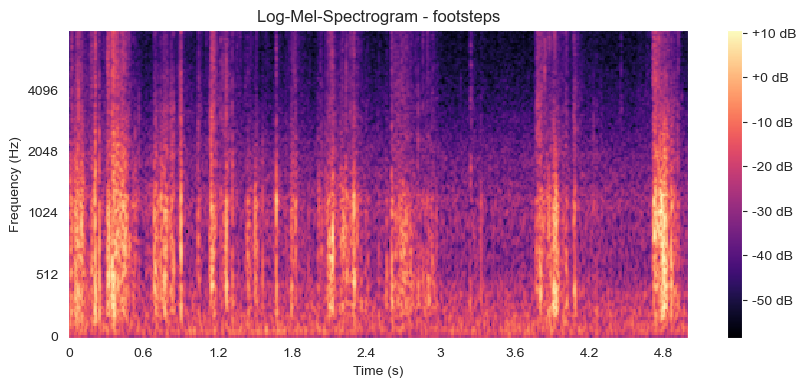

Playing audio: 5-263491-A-25.wav (Category: footsteps)


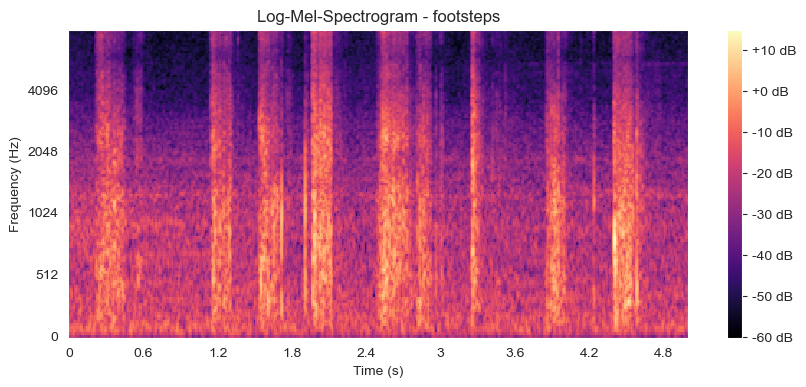

Playing audio: 5-263501-A-25.wav (Category: footsteps)


In [11]:
#Number of examples to display (choose index to change category sounds line 2)
num_examples = 3
index=1989

for i in range(num_examples):
    # Load the audio file
    example_file = os.path.join(audio_files_path, df.loc[i+index, 'filename'])
    signal, sr = librosa.load(example_file, sr=None)

#Generate Mel-spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128, fmax=8000)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

#Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Log-Mel-Spectrogram - {df.loc[i+index, 'category']}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

#Play the audio
    print(f"Playing audio: {df.loc[i+index, 'filename']} (Category: {df.loc[i+index, 'category']})")
    display(Audio(data=signal, rate=sr))

### Cell 8: Feature Extraction Function
This cell defines a function to calculate audio features such as duration, spectral centroid, zero-crossing rate, and RMS energy.

In [12]:
# Function to calculate features
def calculate_features(df, audio_files_path):
    df = df.copy()
    durations = []
    spectral_centroids = []
    zero_crossing_rates = []
    rms_energies = []
    
    for filename in df['filename']:
        file_path = os.path.join(audio_files_path, filename)
        signal, sr = librosa.load(file_path, sr=None)
        
        # Calculate features
        durations.append(len(signal) / sr)
        spectral_centroids.append(librosa.feature.spectral_centroid(y=signal, sr=sr).mean())
        zero_crossing_rates.append(librosa.feature.zero_crossing_rate(y=signal).mean())
        rms_energies.append(librosa.feature.rms(y=signal).mean())
    
    # Add features to DataFrame
    df['duration'] = durations
    df['spectral_centroid'] = spectral_centroids
    df['zero_crossing_rate'] = zero_crossing_rates
    df['rms_energy'] = rms_energies
    
    return df

### Cell 9: Load or Process Data
This cell either loads pre-processed data or processes the raw dataset to extract features.

In [15]:
# Load or process data
if os.path.exists(PROCESSED_FILE):
    print("Loading processed data...")
    processed_data = pd.read_pickle(PROCESSED_FILE)
else:
    print("Processing data...")
    processed_data = calculate_features(df, AUDIO_FILES_PATH)
    processed_data.to_pickle(PROCESSED_FILE)
    print(f"Processed data saved to: {PROCESSED_FILE}")


Loading processed data...


In [16]:
# Display processed data
processed_data.head()

,filename,fold,target,category,esc10,src_file,take,duration,spectral_centroid,zero_crossing_rate,rms_energy
0,1-100032-A-0.wav,1,0,dog,True,100032,A,5.0,273.927703,0.007329,0.007518
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,5.0,4042.281204,0.157994,0.048115
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,5.0,4410.555928,0.199469,0.271033
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,5.0,4370.451735,0.202079,0.274816
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,5.0,2075.738865,0.027574,0.008841


### Cell 10: Visualize Audio Durations
This cell plots the durations of all audio files in the dataset and displays their minimum and maximum values.

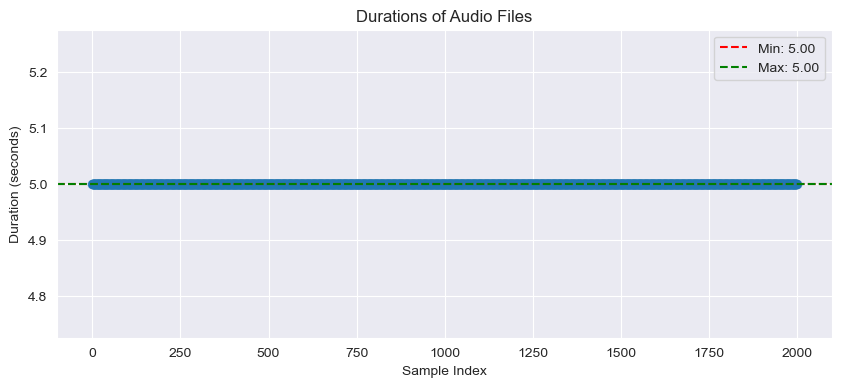

All durations are between 5.00 and 5.00 seconds.


In [17]:
# Calculate min and max duration
min_duration = processed_data['duration'].min()
max_duration = processed_data['duration'].max()

plt.figure(figsize=(10, 4))
plt.scatter(range(len(processed_data)), processed_data['duration'], alpha=0.7)
plt.title("Durations of Audio Files")
plt.xlabel("Sample Index")
plt.ylabel("Duration (seconds)")
plt.axhline(min_duration, color='r', linestyle='--', label=f"Min: {min_duration:.2f}")
plt.axhline(max_duration, color='g', linestyle='--', label=f"Max: {max_duration:.2f}")
plt.legend()
plt.show()

print(f"All durations are between {min_duration:.2f} and {max_duration:.2f} seconds.")


### Cell 11: Compute Energy and Tone for Audio Categories
This cell defines a function that calculates the average energy and tone for each audio category by processing saved spectrogram files. The computed metrics provide key insights into the audio characteristics of each category, enabling further analysis and categorization.

In [18]:
def compute_energy_and_tone(input_dir="processed_spectrograms"):
    """
    Compute average energy and tone for each category using saved spectrograms.

    Parameters:
    - input_dir: Directory where raw spectrograms are saved.

    Returns:
    - metrics: Dictionary with 'energy' and 'tone' for each category.
    """
    metrics = {}

    for category in os.listdir(input_dir):
        category_dir = os.path.join(input_dir, category)
        if not os.path.isdir(category_dir):
            continue

        # Load all spectrograms for this category
        spectrograms = [np.load(os.path.join(category_dir, file)) for file in os.listdir(category_dir)]

        # Compute the average energy and spectral centroid for the category
        mean_spectrogram = np.mean(spectrograms, axis=0)
        mean_energy = np.mean(mean_spectrogram)
        
        # Convert decibel spectrogram back to power spectrogram
        power_spectrograms = [librosa.db_to_power(spectrogram) for spectrogram in spectrograms]
        
        # Compute spectral centroids on power spectrograms
        spectral_centroids = [
            np.mean(librosa.feature.spectral_centroid(S=power_spectrogram)) for power_spectrogram in power_spectrograms
        ]
        mean_tone = np.mean(spectral_centroids)

        metrics[category] = {'energy': mean_energy, 'tone': mean_tone}

    return metrics


### Cell 12: Group Audio Categories by Energy and Tone
This cell defines a function to group audio categories based on their energy and tone metrics.
By computing thresholds (low, medium, high) for both energy and tone, the function categorizes audio into meaningful groups such as "Low Energy, Low Tone" or "High Energy, High Tone."
This grouping facilitates better understanding and analysis of the dataset's audio characteristics

In [12]:
def group_categories(metrics):
    """
    Group categories based on energy and tone.

    Parameters:
    - metrics: Dictionary with 'energy' and 'tone' for each category.

    Returns:
    - groups: Dictionary with groups ('Low Energy, Low Tone', etc.) as keys and lists of categories as values.
    """
    energies = [v['energy'] for v in metrics.values()]
    tones = [v['tone'] for v in metrics.values()]

    # Compute thresholds for grouping
    energy_thresholds = {
        'low': np.percentile(energies, 33),
        'high': np.percentile(energies, 66)
    }
    tone_thresholds = {
        'low': np.percentile(tones, 33),
        'high': np.percentile(tones, 66)
    }

    groups = {'Low Energy, Low Tone': [], 'Low Energy, High Tone': [],
              'High Energy, Low Tone': [], 'High Energy, High Tone': [],
              'Medium Energy and Tone': []}

    for category, values in metrics.items():
        energy, tone = values['energy'], values['tone']
        if energy <= energy_thresholds['low'] and tone <= tone_thresholds['low']:
            groups['Low Energy, Low Tone'].append(category)
        elif energy <= energy_thresholds['low'] and tone > tone_thresholds['high']:
            groups['Low Energy, High Tone'].append(category)
        elif energy > energy_thresholds['high'] and tone <= tone_thresholds['low']:
            groups['High Energy, Low Tone'].append(category)
        elif energy > energy_thresholds['high'] and tone > tone_thresholds['high']:
            groups['High Energy, High Tone'].append(category)
        else:
            groups['Medium Energy and Tone'].append(category)

    return groups

### Cell 13: Visualize Energy and Tone Metrics for Audio Categories
This cell defines a function to create a scatter plot that visualizes the energy and tone metrics of audio categories. The function highlights grouped categories using different colors and styles, providing an intuitive understanding of how categories relate to each other based on their energy and tone characteristics.


In [13]:
def visualize_energy_and_tone(metrics, groups):
    """
    Visualize energy and tone using a scatter plot with categories grouped.

    Parameters:
    - metrics: Dictionary with 'energy' and 'tone' for each category.
    - groups: Dictionary with grouped categories.
    """
    # Create a DataFrame for plotting
    import pandas as pd

    data = []
    for group, categories in groups.items():
        for category in categories:
            data.append({'Category': category, 'Energy': metrics[category]['energy'],
                         'Tone': metrics[category]['tone'], 'Group': group})

    df = pd.DataFrame(data)

    # Scatter plot with seaborn
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='Tone', y='Energy', hue='Group', style='Group', s=100, palette='Set2')

    # Add annotations for each category
    for i, row in df.iterrows():
        plt.text(row['Tone'], row['Energy'], row['Category'], fontsize=9, alpha=0.7)

    plt.title("Energy vs Tone by Category")
    plt.xlabel("Tone (Spectral Centroid)")
    plt.ylabel("Energy")
    plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


### Cell 14: Compute, Group, and Visualize Audio Metrics 
This cell combines the previously defined functions to calculate energy and tone metrics for audio categories, group the categories based on these metrics, and visualize the results. It provides a comprehensive overview of the dataset's characteristics by:
1. **Computing Metrics**: Extracting energy and tone values for each category.
2. **Grouping Categories**: Classifying categories into meaningful groups (e.g., "High Energy, Low Tone").
3. **Visualizing Relationships**: Displaying the grouped metrics in a scatter plot for intuitive analysis.

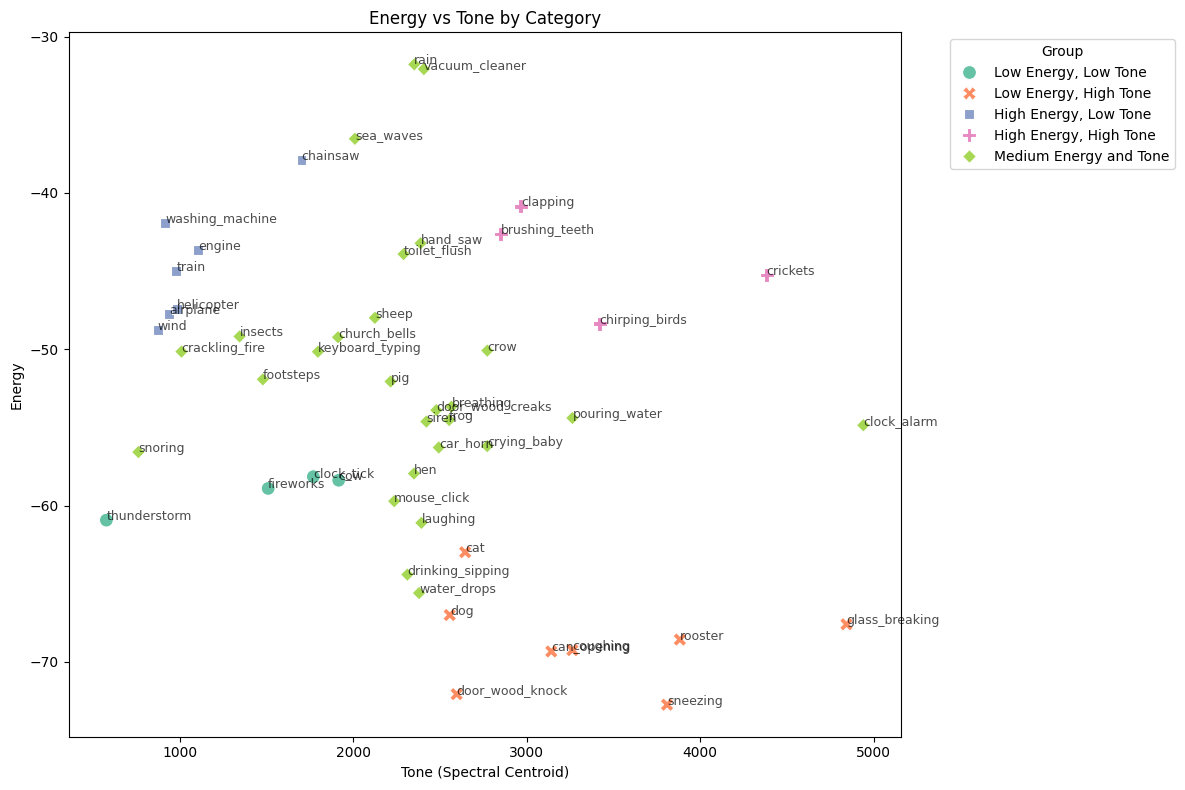

In [20]:
PROCESSED_SPECTOGRAMS_PATH = os.path.join(DATA_PATH,'processed','processed_spectrograms')
metrics = compute_energy_and_tone(input_dir=PROCESSED_SPECTOGRAMS_PATH)
groups = group_categories(metrics)
visualize_energy_and_tone(metrics, groups)
